In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
import numpy as np
import trees
from trees.ddt import *
import mpld3
import seaborn as sns
sns.set_style('white')
from tqdm import tqdm
from sklearn.decomposition import PCA

[[ 4.27121532 -1.39390201]
 [-1.39390201  0.5114112 ]]


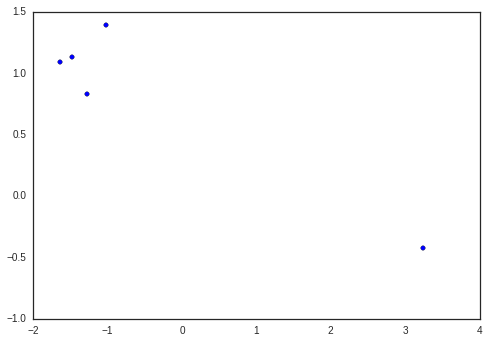

In [3]:
X, y = trees.data.load('zoo')
pca = PCA(n_components=2)
X = pca.fit_transform(X)
X += np.random.normal(scale=.15, size=X.shape)
X = X[:5]
y = y[:5]
print np.cov(X.T)
N, D = X.shape
scatter(*X.T);

INFO:root:Compiling <Inverse> object...
INFO:root:Done compiling <Inverse> object.
INFO:root:Compiling <GaussianLikelihoodModel> object...
INFO:root:Done compiling <GaussianLikelihoodModel> object.


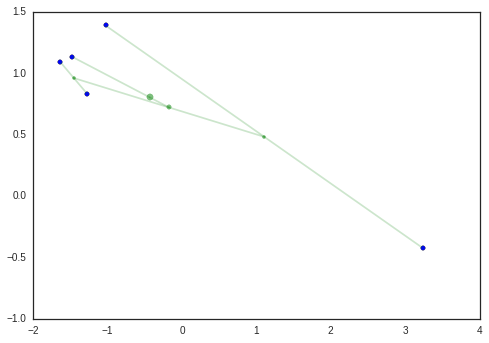

In [8]:
df = Inverse(c=1)

lm = GaussianLikelihoodModel(sigma=np.cov(X.T) / 4.0, sigma0=np.eye(D) / 2.0, mu0=X.mean(axis=0)).compile()
sampler = MetropolisHastingsSampler(DirichletDiffusionTree(df, lm), X)
sampler.initialize_assignments()

def iterate(n_iters):
    lls = []
    for i in tqdm(xrange(n_iters)):
        old_ddt = sampler.ddt
        sampler.sample()
        lls.append(sampler.ddt.marg_log_likelihood())
        #if old_ddt != gs.ddt:
        #    logging.info("Iteration %u: %f (accept)" % (i, gs.ddt.log_likelihood()))
        #else:
        #    logging.info("Iteration %u: %f (reject)" % (i, gs.ddt.log_likelihood()))
    return lls
def plot_tree(ddt):
    scatter(*X.T)
    def plot_node(node, size=40):
        if isinstance(node, Leaf):
            return
        scatter(*node.state, color='g', alpha=0.5,s=size)
        for child in node.children:
            plot(*zip(node.state, child.state), color='g', alpha=0.2)
            plot_node(child, size=size/2)
    plot_node(ddt.root)
plt.figure()
plot_tree(sampler.ddt)

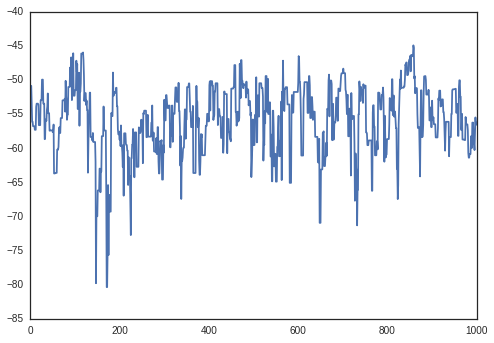

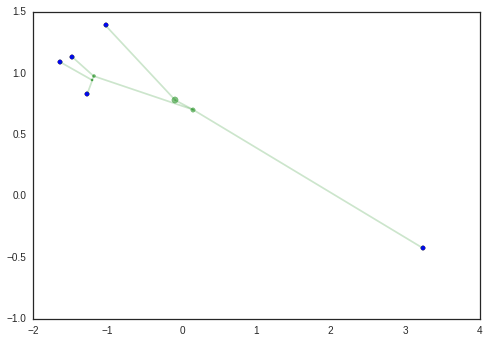

In [7]:
plot(iterate(1000))
figure()
plot_tree(sampler.ddt)

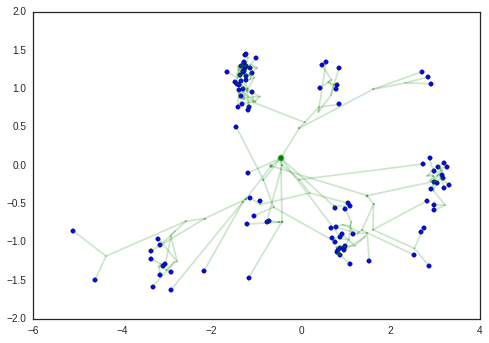

In [113]:
#sampler.sample()
plot_tree(sampler.ddt)

In [6]:
mpld3.display(sampler.ddt.plot_mpld3(y))

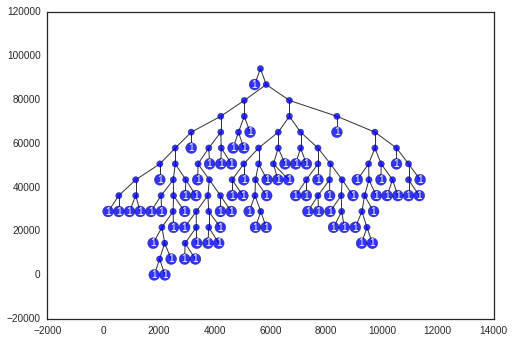

In [89]:
sampler.ddt.plot();

In [121]:
X[y.index('aardvark')]

array([-1.41416697,  0.76320356])

In [9]:
np.cov(X.T)

array([[ 4.74450119, -0.71249643],
       [-0.71249643,  1.02064933]])